# Covid-19 (Corona Virus) Dataset in South Korea
## by Cherif Arsanious

## Preliminary Wrangling

> From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community.

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

COVID-19 has infected more than 8000 people in South Korea.
KCDC (Korea Centers for Disease Control & Prevention) announces the information of COVID-19 quickly and transparently.
Kaggle website made a structured dataset based on the report materials of KCDC and local governments.
Also, we analyze and visualize the data using various data mining or visualization techniques.

link to Kaggle dataset https://www.kaggle.com/kimjihoo/coronavirusdataset


In [0]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
! git clone https://github.com/CherifArsanious/corona-virus-data-south-korea.git

Cloning into 'corona-virus-data-south-korea'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [4]:
df=pd.read_csv('PatientInfo.csv')
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [5]:
df.tail()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
2238,6100000085,NaN,male,1990.0,30s,Korea,Gyeongsangnam-do,Changwon-si,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16,NaN,NaN,NaN
2239,7000000001,139.0,male,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,87.0,NaN,2020-02-20,NaN,NaN,isolated
2240,7000000002,222.0,female,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,84.0,NaN,2020-02-22,2020-03-07,NaN,released
2241,7000000003,4345.0,female,1972.0,40s,Korea,Jeju-do,etc,NaN,etc,NaN,NaN,21.0,NaN,2020-03-02,2020-03-15,NaN,released
2242,7000000004,5534.0,male,1974.0,40s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,74.0,NaN,2020-03-04,NaN,NaN,isolated


In [6]:
df.shape

(2243, 18)

In [35]:
df_2=df.groupby(['city'])['patient_id'].count()

df_2=pd.DataFrame(df_2)
df_2=df_2.reset_index()
df_2=df_2.rename(columns={'patient_id':'nb_of_patients'})
df_2

,city,nb_of_patients
0,Andong-si,47
1,Ansan-si,5
2,Anseong-si,1
3,Anyang-si,14
4,Asan-si,9
...,...,...
129,Yongin-si,24
130,Yongsan-gu,5
131,Yuseong-gu,11
132,etc,26


In [40]:
region_df = pd.read_csv('Region.csv')
region_df.head()
region_df2= region_df.groupby(['province'])[['elementary_school_count','kindergarten_count','university_count','academy_ratio','elderly_population_ratio','nursing_home_count']].sum()
region_df2= region_df2.reset_index()
region_df2

,province,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,nursing_home_count
0,Busan,608,816,44,22.57,329.08,13504
1,Chungcheongbuk-do,518,656,34,12.28,278.31,5538
2,Chungcheongnam-do,818,998,42,17.96,381.51,7282
3,Daegu,458,710,22,15.42,153.28,10166
4,Daejeon,296,520,30,8.55,86.26,5968
5,Gangwon-do,698,736,36,21.22,434.92,5038
6,Gwangju,310,624,34,14.84,88.89,5704
7,Gyeonggi-do,2554,4474,122,45.46,461.75,40982
8,Gyeongsangbuk-do,942,1414,66,22.77,661.35,8948
9,Gyeongsangnam-do,1002,1372,42,25.90,470.24,10728


In [37]:
weather_df=pd.read_csv('Weather.csv')
weather_df.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-03-17,9.3,2.0,14.7,0.0,3.2,70.0,40.9
1,10000,Seoul,2016-03-18,13.4,8.8,20.1,0.0,5.0,110.0,50.0
2,10000,Seoul,2016-03-19,11.4,6.6,18.1,0.0,4.8,320.0,58.3
3,10000,Seoul,2016-03-20,10.6,4.9,17.5,0.0,4.6,320.0,54.0
4,10000,Seoul,2016-03-21,9.9,5.5,16.1,0.0,5.4,320.0,54.1


In [39]:
weather_df2=weather_df.groupby(['province'])['avg_temp'].mean()
weather_df2=pd.DataFrame(weather_df2)
weather_df2=weather_df2.reset_index()
weather_df2

,province,avg_temp
0,Busan,15.571800
1,Chungcheongbuk-do,12.478904
2,Chungcheongnam-do,12.681680
3,Daegu,14.655685
4,Daejeon,13.928884
5,Gangwon-do,14.251061
6,Gwangju,14.899316
7,Gyeonggi-do,13.189733
8,Gyeongsangbuk-do,13.940316
9,Gyeongsangnam-do,14.793908


In [33]:
df_new=pd.merge(df_2,weather_df2,on='province')
df_new=pd.merge(df_new,region_df2,on='province')
df_new

,province,nb_of_patients,avg_temp,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,nursing_home_count
0,Busan,101,15.571800,608,816,44,22.57,329.08,13504
1,Chungcheongbuk-do,28,12.478904,518,656,34,12.28,278.31,5538
2,Chungcheongnam-do,118,12.681680,818,998,42,17.96,381.51,7282
3,Daegu,63,14.655685,458,710,22,15.42,153.28,10166
4,Daejeon,22,13.928884,296,520,30,8.55,86.26,5968
5,Gangwon-do,29,14.251061,698,736,36,21.22,434.92,5038
6,Gwangju,19,14.899316,310,624,34,14.84,88.89,5704
7,Gyeonggi-do,300,13.189733,2554,4474,122,45.46,461.75,40982
8,Gyeongsangbuk-do,1054,13.940316,942,1414,66,22.77,661.35,8948
9,Gyeongsangnam-do,85,14.793908,1002,1372,42,25.90,470.24,10728


TypeError: ignored

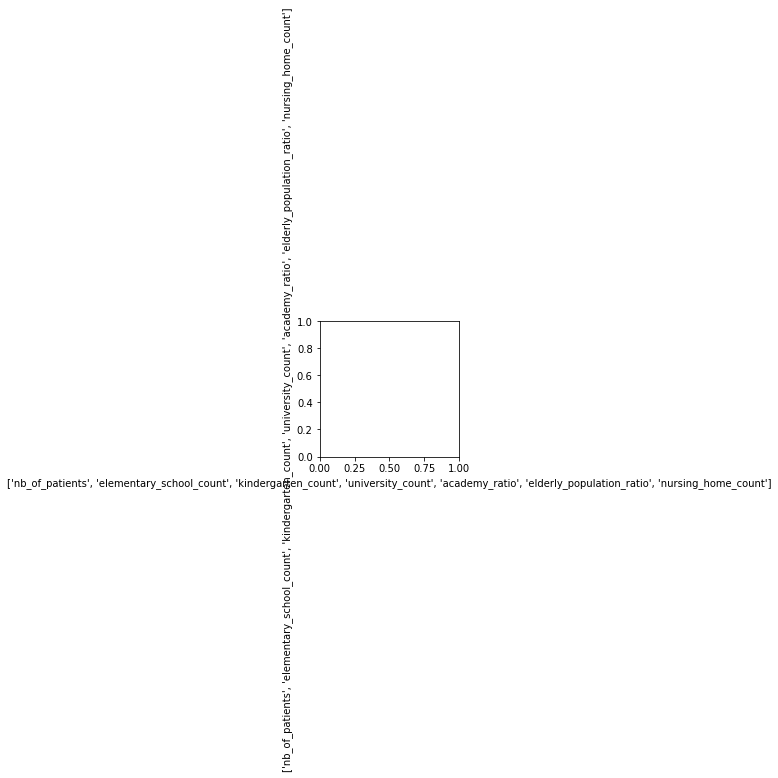

In [45]:
g=sb.PairGrid(data='df_new',vars = ['nb_of_patients','elementary_school_count','kindergarten_count','university_count','academy_ratio','elderly_population_ratio','nursing_home_count'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

RuntimeError: ignored

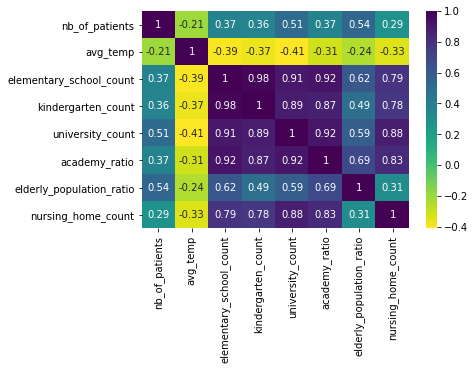

In [43]:
sb.heatmap(df_new.corr(),annot=True,cmap='viridis_r')
plt.colorbar()

### What is the structure of your dataset?

#### Epidemiological data of COVID-19 patients in South Korea
* patient_id: the ID of the patient
* patient_id(10) = region_code(5) + patient_number(5)
You can check the region_code in 'Region.csv'
There are two types of the patient_number
1) local_num: The number given by the local government.
2) global_num: The number given by the KCDC
global_num: the number given by KCDC
There are some patients having no global_num.
The paitents in Busan doesn't have the global_num.
* sex: the sex of the patient
* birth_year: the birth year of the patient
* age: the age of the patient
0s: 0 ~ 9
10s: 10 ~ 19
...
90s: 90 ~ 99
100s: 100 ~ 109
* country: the country of the patient
* province: the province of the patient
* city: the city of the patient
* disease: TRUE: underlying disease / FALSE: no disease
* infection_case: the case of infection
* infection_order: the order of infection
infected_by: the ID of who infected the patient
This column refers to the 'patient_id' column.
* contact_number: the number of contacts with people
* symptom_onset_date: the date of symptom onset
* confirmed_date: the date of being confirmed
* released_date: the date of being released
* deceased_date: the date of being deceased
* state: isolated / released / deceased
isolated: being isolated in the hospital
released: being released from the hospital
deceased: being deceased

### What is/are the main feature(s) of interest in your dataset?

* I am interesting in visualizing what factors could be affecting the mortality rate in patients with corona virus

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The columns in the dataset that can help me in investigating my main interest
* Sex
* Age group
* state
* disease


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!